In [1]:
import sys
!{sys.executable} -m pip install --upgrade networkx
!{sys.executable} -m pip install --upgrade pandas
!{sys.executable} -m pip install --upgrade matplotlib

     |████████████████████████████████| 1.6 MB 999 kB/s eta 0:00:01
You should consider upgrading via the '/home/david/.virtualenvs/JupyterLab/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 9.9 MB 894 kB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.4
    Uninstalling pandas-1.1.4:
      Successfully uninstalled pandas-1.1.4
You should consider upgrading via the '/home/david/.virtualenvs/JupyterLab/bin/python -m pip install --upgrade pip' command.
Requirement already up-to-date: matplotlib in /home/david/.virtualenvs/JupyterLab/lib/python3.7/site-packages (3.3.3)
You should consider upgrading via the '/home/david/.virtualenvs/JupyterLab/bin/python -m pip install --upgrade pip' command.


In [2]:
import networkx as nx
import pandas as pd
import random
import numpy as np

# Mostrar imágenes
from IPython.display import HTML

# Mathplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [3]:
def plot_DG(DG, with_labels=True):
    
    node_colors = [] 
    for k,v in DG.nodes(data=True):
        node_colors.append(v["node_temp"])
    
    edge_colors = []
    for n1, n2, d in DG.edges(data=True):
        edge_colors.append(d["edge_temp"])
        
    return nx.draw(DG, pos=positions, 
            node_color=node_colors,
            edge_color=edge_colors,
            node_size=1000,
            font_size=10,
            with_labels=with_labels,
            arrowsize=20,
            node_shape="H",
            cmap=plt.cm.Reds)
    #plt.show()

def plot_shortest_path(DG, path, with_labels=True):
    # Ploteamos el DG para luego mostrar el path encima
    plot_DG(DG, with_labels=with_labels)
    
    short_path=nx.DiGraph()
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])

    nx.draw(short_path, pos=positions,
                edge_color='dodgerblue',
                node_shape="H",
                width=5, with_labels=with_labels, node_size=600,
                arrowsize=20,
                alpha=0.4
           )
    plt.show()

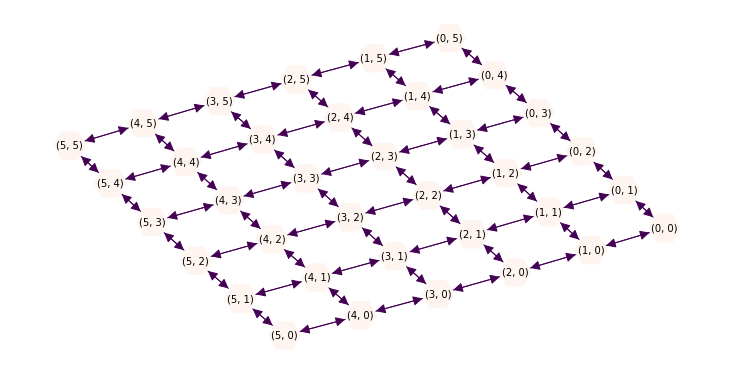

In [4]:
DG = nx.grid_2d_graph(6, 6, periodic=False).to_directed()
DG.add_nodes_from(DG.nodes(), node_temp=0)
DG.add_edges_from(DG.edges(), edge_temp=0)

positions = nx.kamada_kawai_layout(DG,)

start_node = list(DG.nodes())[0]
end_node = list(DG.nodes())[-1]

plot_DG(DG, with_labels=True)
#plt.show()


# Creamos la temperatura de los nodes

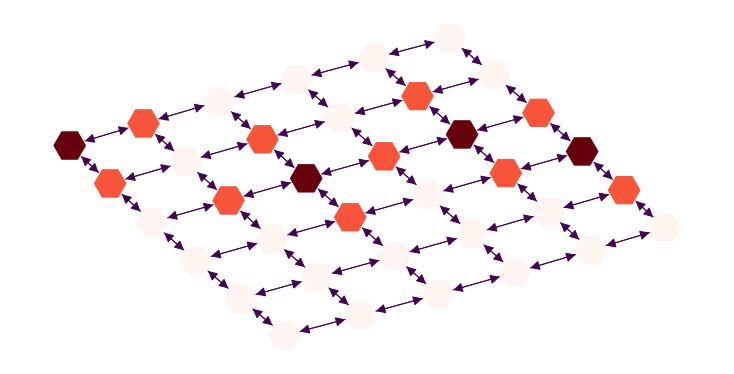

In [5]:
# Creamos la temperatura de los nodes
hot_nodes = random.choices(list(DG.nodes()), k=5)
DG.add_nodes_from(hot_nodes, node_temp=0.9)

#Para cada item de hot_nodes
for hot_node in hot_nodes:
    this_neighbors = list(DG.neighbors(hot_node))
    DG.add_nodes_from(this_neighbors, node_temp=0.5)

plot_DG(DG, with_labels=False)

# Ahora le damos los pesos a los edges.

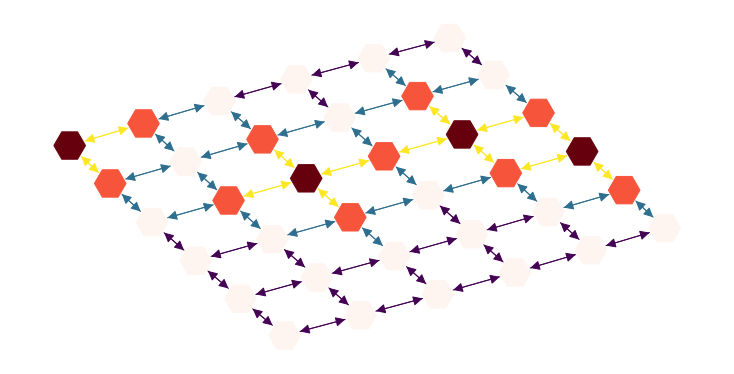

In [6]:
# Ahora le damos los pesos a los edges.
for edge_ori, edge_dest in list(DG.edges()):
    #print("Ori: %s -> dest: %s" % (edge_ori, edge_dest))
    #print(DG.nodes[edge_ori]["node_temp"])
    DG.add_edges_from(
        [(edge_ori, edge_dest)], 
        edge_temp=np.mean(
            [DG.nodes[edge_ori]["node_temp"], 
             DG.nodes[edge_dest]["node_temp"]]
        )
    )
    
# Vemos los edges
#print(DG.edges(data=True))

# Vemos los nodes
#print(DG.nodes(data=True))
plot_DG(DG, with_labels=False)

# Camino más corto

In [29]:
# Camino más corto
nx.astar_path(DG, start_node, end_node)

NodeNotFound: Either source (0, 0) or target (49, 49) is not in G

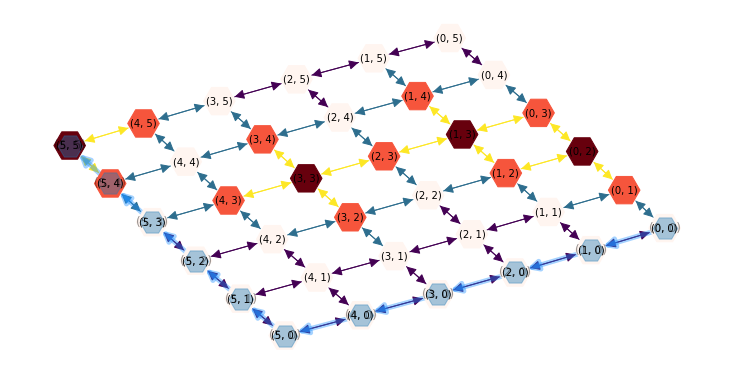

In [8]:
plot_shortest_path(DG, nx.astar_path(DG, start_node, end_node, ), with_labels=True)

# Camino más corto teniendo en uenta temperatura

In [9]:
# Camino más corto teniendo en uenta temperatura
nx.astar_path(DG, start_node, end_node, weight='edge_temp')

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5)]

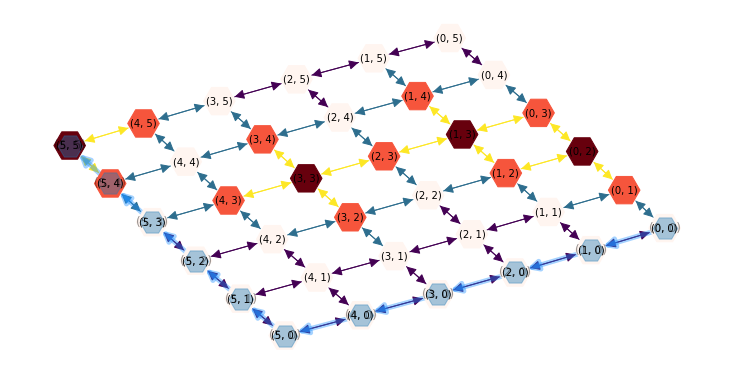

In [10]:
# Ploteamos el camino más corto teniendo en cuenta la temperatura de los edges
plot_shortest_path(DG, nx.astar_path(DG, start_node, end_node, weight='edge_temp'), with_labels=True)

In [11]:
to_remove = [
    (5, 1), (4, 2), (3, 3),
    (0, 2), (1, 1), (2, 1)
]
for node in to_remove:
    DG.remove_node(node)

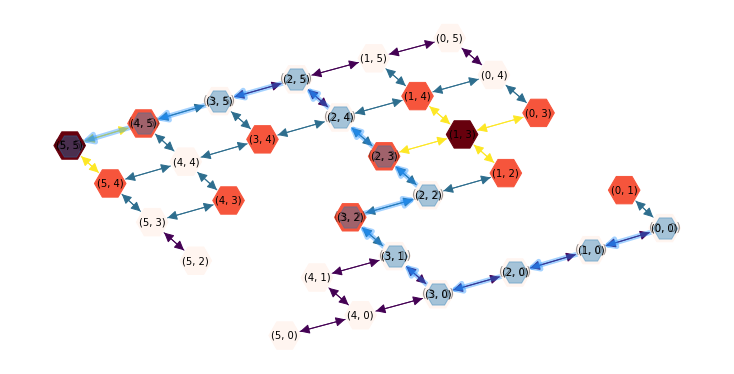

In [12]:
# Ploteamos el camino más corto teniendo en cuenta la temperatura de los edges
plot_shortest_path(DG, nx.astar_path(DG, start_node, end_node, weight='edge_temp'), with_labels=True)

# Ejemplos para el apunte en el weblog

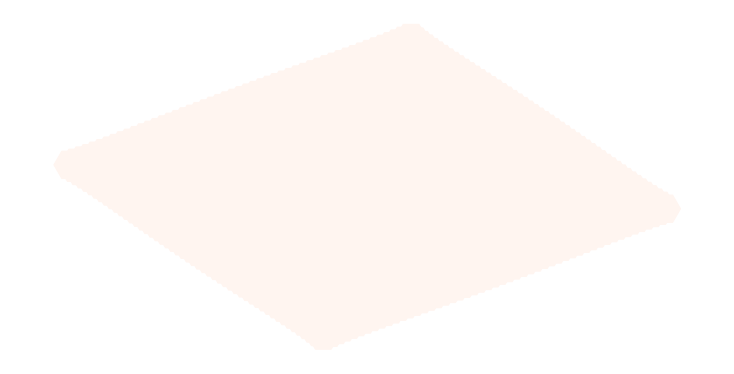

In [13]:
DG = nx.grid_2d_graph(50, 50, periodic=False).to_directed()
DG.add_nodes_from(DG.nodes(), node_temp=0)
DG.add_edges_from(DG.edges(), edge_temp=0)

positions = nx.kamada_kawai_layout(DG,)

start_node = list(DG.nodes())[0]
end_node = list(DG.nodes())[-1]

plot_DG(DG, with_labels=False)

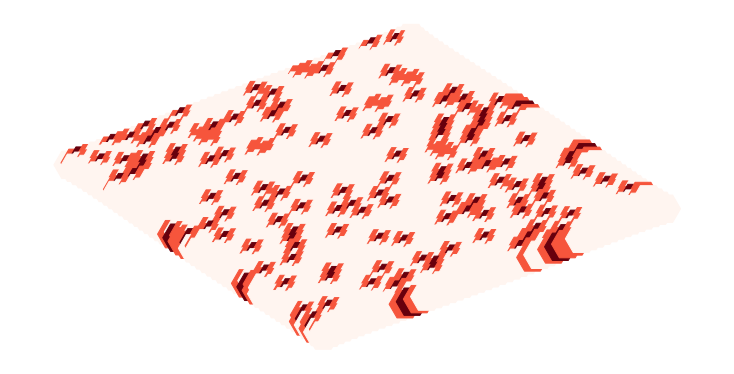

In [14]:
# Creamos la temperatura de los nodes
hot_nodes = random.choices(list(DG.nodes()), k=150)
DG.add_nodes_from(hot_nodes, node_temp=0.9)

#Para cada item de hot_nodes
for hot_node in hot_nodes:
    this_neighbors = list(DG.neighbors(hot_node))
    DG.add_nodes_from(this_neighbors, node_temp=0.5)

plot_DG(DG, with_labels=False)

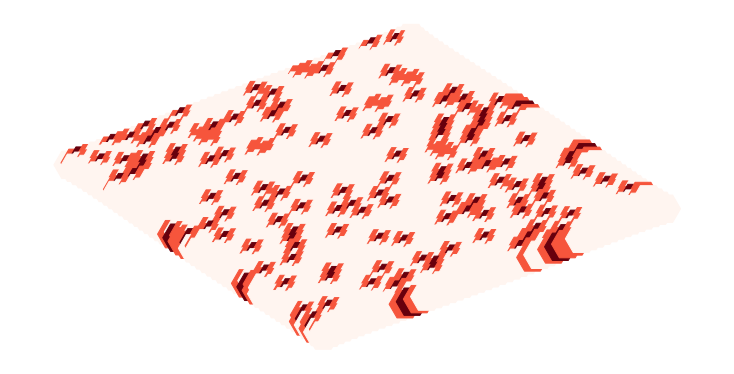

In [15]:
# Ahora le damos los pesos a los edges.
for edge_ori, edge_dest in list(DG.edges()):
    #print("Ori: %s -> dest: %s" % (edge_ori, edge_dest))
    #print(DG.nodes[edge_ori]["node_temp"])
    DG.add_edges_from(
        [(edge_ori, edge_dest)], 
        edge_temp=np.mean(
            [DG.nodes[edge_ori]["node_temp"], 
             DG.nodes[edge_dest]["node_temp"]]
        )
    )
    
# Vemos los edges
#print(DG.edges(data=True))

# Vemos los nodes
#print(DG.nodes(data=True))
plot_DG(DG, with_labels=False)

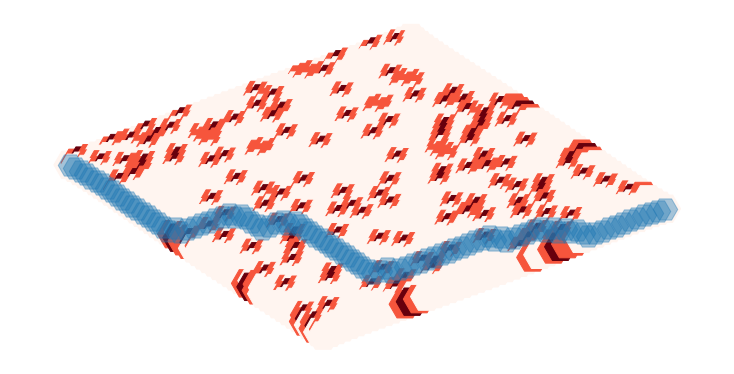

In [16]:
plot_shortest_path(DG, nx.astar_path(DG, start_node, end_node, weight='edge_temp'), with_labels=False)